# Imports

In [1]:
import timm
from fastai.vision.all import *
from fastai.vision.widgets import *
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
from ipywidgets import Box, Button, Text
import asyncio
from IPython.core.display import display
from IPython.display import clear_output

/tmp/ipykernel_90267/335564615.py:11: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


In [2]:
root_dir = "/media/hdd/Datasets/Landscapes"
path=Path(root_dir)/"sorted"

In [3]:
new_path = Path(root_dir)/"temporary_acceptance"

# Download missing

In [120]:
down_path = Path(root_dir)/"sorted"/"temp"

In [121]:
from fastcore.all import *
import time
from fastdownload import download_url
from tqdm import tqdm

def search_images(term, max_images=200):
    url = 'https://duckduckgo.com/'
    res = urlread(url,data={'q':term})
    searchObj = re.search(r'vqd=([\d-]+)\&', res)
    requestUrl = url + 'i.js'
    params = dict(l='us-en', o='json', q=term, vqd=searchObj.group(1), f=',,,', p='1', v7exp='a')
    urls,data = set(),{'next':1}
    while len(urls)<max_images and 'next' in data:
        data = urljson(requestUrl,data=params)
        urls.update(L(data['results']).itemgot('image'))
        requestUrl = url + data['next']
        time.sleep(0.2)
    return L(urls)[:max_images]


In [ ]:
searches = 'Animals', 'Mech'
for o in searches:
    dest = (down_path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    print(f'{o} photo')
    resize_images(down_path/o, max_size=400, dest=path/o)

In [7]:
failed = verify_images(get_image_files(down_path))
failed.map(Path.unlink)
len(failed)

0

# Setting Up Data for First Run

In [123]:
fields = DataBlock(blocks=(ImageBlock, CategoryBlock),
   get_items=get_image_files,
   get_y=parent_label,
   splitter=RandomSplitter(valid_pct=0.2, seed=42),
   item_tfms=RandomResizedCrop(224, min_scale=0.5),
   batch_tfms=aug_transforms(),
   )

In [124]:
dls = fields.dataloaders(path)

In [125]:
dls.vocab

['Airplanes', 'Animals', 'Armor', 'Birds', 'Desert', 'Fields', 'Flowers', 'Food', 'Forest', 'Jewellery', 'Mech', 'Modern Architecture', 'Mountain', 'Old Architecture', 'People', 'Plants', 'Ships', 'Statues', 'Utensils', 'Vehicles', 'Water', 'Weapons', 'modern clothes', 'vintage clothes']

In [126]:
# dls.show_batch()

In [127]:
learn = vision_learner(dls, 'vit_relpos_small_patch16_224', metrics=[accuracy,error_rate]).to_fp16()

In [140]:
learn = load_learner('export.pkl')

learn.dls = dls

In [141]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,accuracy,error_rate,time


UnidentifiedImageError: Caught UnidentifiedImageError in DataLoader worker process 6.
Original Traceback (most recent call last):
  File "/home/eragon/mambaforge/envs/pytorcher/lib/python3.10/site-packages/torch/utils/data/_utils/worker.py", line 287, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/eragon/mambaforge/envs/pytorcher/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 39, in fetch
    data = next(self.dataset_iter)
  File "/home/eragon/mambaforge/envs/pytorcher/lib/python3.10/site-packages/fastai/data/load.py", line 143, in create_batches
    yield from map(self.do_batch, self.chunkify(res))
  File "/home/eragon/mambaforge/envs/pytorcher/lib/python3.10/site-packages/fastcore/basics.py", line 219, in chunked
    res = list(itertools.islice(it, chunk_sz))
  File "/home/eragon/mambaforge/envs/pytorcher/lib/python3.10/site-packages/fastai/data/load.py", line 158, in do_item
    try: return self.after_item(self.create_item(s))
  File "/home/eragon/mambaforge/envs/pytorcher/lib/python3.10/site-packages/fastai/data/load.py", line 165, in create_item
    if self.indexed: return self.dataset[s or 0]
  File "/home/eragon/mambaforge/envs/pytorcher/lib/python3.10/site-packages/fastai/data/core.py", line 458, in __getitem__
    res = tuple([tl[it] for tl in self.tls])
  File "/home/eragon/mambaforge/envs/pytorcher/lib/python3.10/site-packages/fastai/data/core.py", line 458, in <listcomp>
    res = tuple([tl[it] for tl in self.tls])
  File "/home/eragon/mambaforge/envs/pytorcher/lib/python3.10/site-packages/fastai/data/core.py", line 417, in __getitem__
    return self._after_item(res) if is_indexer(idx) else res.map(self._after_item)
  File "/home/eragon/mambaforge/envs/pytorcher/lib/python3.10/site-packages/fastai/data/core.py", line 377, in _after_item
    def _after_item(self, o): return self.tfms(o)
  File "/home/eragon/mambaforge/envs/pytorcher/lib/python3.10/site-packages/fastcore/transform.py", line 200, in __call__
    def __call__(self, o): return compose_tfms(o, tfms=self.fs, split_idx=self.split_idx)
  File "/home/eragon/mambaforge/envs/pytorcher/lib/python3.10/site-packages/fastcore/transform.py", line 150, in compose_tfms
    x = f(x, **kwargs)
  File "/home/eragon/mambaforge/envs/pytorcher/lib/python3.10/site-packages/fastcore/transform.py", line 73, in __call__
    def __call__(self, x, **kwargs): return self._call('encodes', x, **kwargs)
  File "/home/eragon/mambaforge/envs/pytorcher/lib/python3.10/site-packages/fastcore/transform.py", line 83, in _call
    return self._do_call(getattr(self, fn), x, **kwargs)
  File "/home/eragon/mambaforge/envs/pytorcher/lib/python3.10/site-packages/fastcore/transform.py", line 89, in _do_call
    return retain_type(f(x, **kwargs), x, ret)
  File "/home/eragon/mambaforge/envs/pytorcher/lib/python3.10/site-packages/fastcore/dispatch.py", line 123, in __call__
    return f(*args, **kwargs)
  File "/home/eragon/mambaforge/envs/pytorcher/lib/python3.10/site-packages/fastai/vision/core.py", line 120, in create
    return cls(load_image(fn, **merge(cls._open_args, kwargs)))
  File "/home/eragon/mambaforge/envs/pytorcher/lib/python3.10/site-packages/fastai/vision/core.py", line 95, in load_image
    im = Image.open(fn)
  File "/home/eragon/mambaforge/envs/pytorcher/lib/python3.10/site-packages/PIL/Image.py", line 3123, in open
    raise UnidentifiedImageError(
PIL.UnidentifiedImageError: cannot identify image file '/media/hdd/Datasets/Landscapes/sorted/temp/Mech/28b86c04-7526-4b9f-8af2-28988c9105f1.jpg'


In [9]:
learn.export()

/home/eragon/mambaforge/envs/pytorcher/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/home/eragon/mambaforge/envs/pytorcher/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


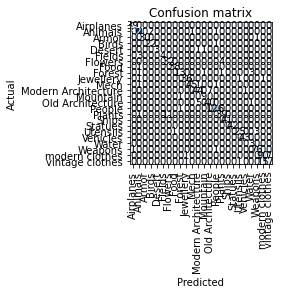

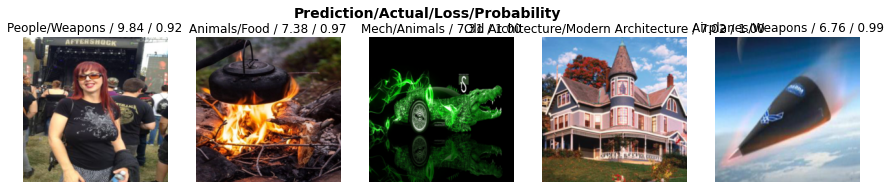

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(5, nrows=1)

In [16]:
cleaner = ImageClassifierCleaner(learn)

/home/eragon/mambaforge/envs/pytorcher/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [25]:
cleaner

In [18]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [32]:
cleaner.change()

(#0) []

In [30]:
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

# Predictions

In [142]:
predictions_path=Path(root_dir)/"unlabelled"
new_path = Path(root_dir)/"temporary_acceptance"

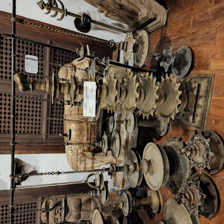

In [143]:
tmp_im = predictions_path.ls()[100]
Image.open(tmp_im).resize((224,224))

In [145]:
learn.predict(tmp_im)

('Utensils',
 tensor(18),
 tensor([3.2465e-04, 1.3686e-02, 1.8274e-03, 1.7635e-03, 1.8914e-03, 1.6885e-04,
         3.9131e-04, 2.6408e-03, 3.7913e-04, 6.4714e-03, 3.6015e-02, 1.8553e-02,
         3.0221e-03, 1.4199e-01, 1.2692e-03, 2.0077e-03, 2.4022e-02, 5.6285e-03,
         6.9280e-01, 2.7171e-03, 5.7323e-03, 1.5198e-02, 6.8519e-03, 1.4654e-02]))

In [146]:
from tqdm.notebook import tqdm

In [147]:
def predict_batch(self, item, rm_type_tfms=None, with_input=False):
    dl = self.dls.test_dl(item, rm_type_tfms=rm_type_tfms, num_workers=0)
    ret = self.get_preds(dl=dl,with_input=False, with_decoded=True)
    return ret
Learner.predict_batch = predict_batch

In [148]:
classes = dls.vocab

In [149]:
tst_files = get_image_files(predictions_path)

In [150]:
preds = learn.predict_batch(tst_files)

/home/eragon/mambaforge/envs/pytorcher/lib/python3.10/site-packages/PIL/Image.py:3011: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [151]:
preds_mapped = list(map(lambda x: classes[int(x)] , preds[2]))

In [152]:
new_path = Path(root_dir)/"temporary_acceptance"

In [153]:
for i,file in enumerate(tst_files):
    temp_path = new_path/preds_mapped[i]
    temp_path.mkdir(exist_ok=True, parents=True)
    shutil.move(file, temp_path)